# Example Notebook for the bootstrap of performance measures of a simple U-Statistic

We use the famous [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


iris = sns.load_dataset('iris')



In [ ]:
# Quick preview of the data.

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


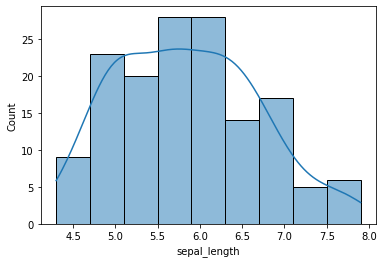

In [ ]:
# Let's focus on one variable, the sepal length.

sepal_length = iris.sepal_length
sns.histplot(sepal_length, kde = True)

In this example we use a very simple U-statistic, the sample variance. \\
$ U_n  = \frac{2}{n(n-1)} \sum_{1 \leq i  < j \leq n} (X_i - X_j)^2 = \frac{1}{n-1}  \sum_{i=1}^n \left(X_i- \bar X\right)^2 $

In [ ]:
# Calculate U_n, the sample variance
u_n = np.var(sepal_length, ddof = 1)
u_n

0.6856935123042507

We want to approximate the three following performance measures of $U_n$: \\

Error Distribution: \\
￼$$\lambda_{n,1}(F) = \mathbb{\sf P}_F \left[ \sqrt{n}(U_n - \theta) \leq c \right]$$ \\
$$\lambda_{n,1}( F_n) = \mathbb{\sf P}_{ F_n} \left[ \sqrt{n}(U_n^* - U_n) \leq c \right]$$ \\
$$\lambda_{n,1}( F_n) = \frac{1}{B} \sum_{b = 1}^B \mathbb{\sf I}\left(\sqrt n (U_{n,b}^* - U_n \right) \leq c)$$ \\
\
Bias: \\
￼ $$\lambda_{n,2}(F) = \mathbb{\sf E}_F \left(U_n \right) - \theta$$ \\
$$\lambda_{n,2}( F_n) = \mathbb{\sf E}_{ F_n} \left(U_n^* \right) - U_n$$ \\
$$\lambda_{n,2}^B( F_n) = \frac{1}{B} \sum_{b=1} ^B U_{n,b}^* - U_n$$ \\
\
Variance: \\
$$\lambda_{n,3}(F) = \mathbb{\sf{Var}}_F \left( U_n \right)$$ \\
$$\lambda_{n,3}( F_n) = \mathbb{\sf{Var}}_{ F_n} \left( U_n^* \right)$$ \\
$$\lambda_{n,3}^B( F_n) = \frac{1}{B} \sum_{b = 1}^B \left( U_{n, b}^* - U_n \right)^2$$
￼

First we draw $B = 1000$ Bootstrap Samples from variable sepal length.

In [ ]:
B = 1000
n = len(sepal_length)
bootstrap_samples = [np.random.choice(sepal_length, size = n) for i in np.arange(B)]

Now we calculate $U_n^*$ for every single bootstrap sample.

In [ ]:
u_n_star_list = [np.var(sample, ddof = 1) for sample in bootstrap_samples]

Let's plot the distribution of all $U_n^*$. The red line shows our original $U_n$.

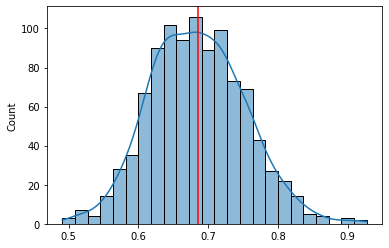

In [ ]:
sns.histplot(u_n_star_list, kde = True)
plt.axvline(u_n, color = "red")

Calculate $$\lambda_{n,1}^B( F_n) = \frac{1}{B} \sum_{b = 1}^B \mathbb{\sf I}\left(\sqrt n (U_{n,b}^* - U_n \right) \leq c)$$ for $c=0.05$

In [ ]:
c = 0.05
lambda_bootstrap_one = 1 / B * np.sum([(np.sqrt(n) * (x - u_n) <= c)for x in u_n_star_list])
lambda_bootstrap_one

0.544

Calculate $$\lambda_{n,2}^B( F_n) = \frac{1}{B} \sum_{b=1} ^B U_{n,b}^* - U_n$$

In [ ]:
lambda_bootstrap_two = np.mean(u_n_star_list) - u_n
lambda_bootstrap_two

-0.0008049892617448817

Pretty close to 0, which is good, since the U-statistic is supposed to be unbiased. The more we increase B, the closer it will get to 0.

Calculate $$\lambda_{n,3}^B( F_n) = \frac{1}{B} \sum_{b = 1}^B \left( U_{n, b}^* - U_n \right)^2$$

In [ ]:
lambda_bootstrap_three = np.mean([(x - u_n)**2 for x in u_n_star_list])
lambda_bootstrap_three

0.004578396503699233